# Loading data to google colab

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
import numpy as np
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import os

In [76]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()

In [11]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


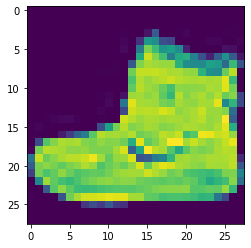

In [12]:
plt.imshow(xtrain[0])

In [13]:
ytrain

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
print(xtrain.max())
print(xtrain.min())

255
0


In [17]:
xtrain=xtrain/255
xtest=xtest/255

distribution of differant categories

(array([6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000.,
        6000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

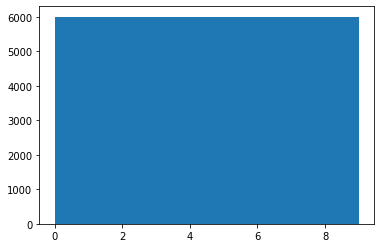

In [19]:
plt.hist(ytrain,bins=10)

# Reshaping data and converting label one hot encoding

In [21]:
xtrain=xtrain.reshape(60000, 28, 28, 1)
xtest=xtest.reshape(10000, 28, 28, 1)

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
ytrain=to_categorical(ytrain)

# Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
model1= Sequential()

# Concolutional layers
model1.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",input_shape=(28,28,1)))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(filters=64,kernel_size=(4,4),activation="relu",input_shape=(28,28,1)))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(128,activation="relu"))

model1.add(Dense(10,activation="softmax"))

model1.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [54]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 9, 9, 64)          32832     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [55]:
es=EarlyStopping(patience=2)

In [56]:
model1.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=25,callbacks=[es])

Epoch 1/25
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4829 - accuracy: 0.8223 - val_loss: 0.4020 - val_accuracy: 0.8545
Epoch 2/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3245 - accuracy: 0.8816 - val_loss: 0.3300 - val_accuracy: 0.8774
Epoch 3/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2781 - accuracy: 0.8970 - val_loss: 0.2979 - val_accuracy: 0.8922
Epoch 4/25
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2450 - accuracy: 0.9093 - val_loss: 0.2866 - val_accuracy: 0.8960
Epoch 5/25
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2219 - accuracy: 0.9173 - val_loss: 0.2754 - val_accuracy: 0.9015
Epoch 6/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2030 - accuracy: 0.9223 - val_loss: 0.2806 - val_accuracy: 0.8997
Epoch 7/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1823 - accuracy: 0.9315 - val_loss: 0.2862 - val_ac

In [57]:
import pandas as pd
results=pd.DataFrame(model1.history.history)

In [58]:
results.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

# Results

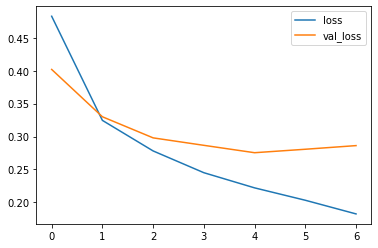

In [59]:
results[["loss","val_loss"]].plot()

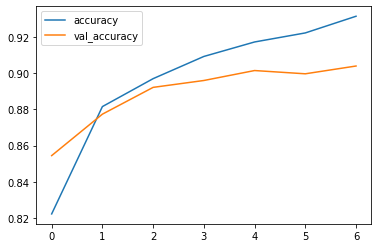

In [60]:
results[["accuracy","val_accuracy"]].plot()

**Prediction**

In [63]:
prediction=np.argmax(model1.predict(xtest), axis=-1)

In [67]:
from sklearn import metrics

In [78]:
print(metrics.classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1000
           1       0.98      0.99      0.98      1000
           2       0.82      0.89      0.86      1000
           3       0.93      0.90      0.91      1000
           4       0.82      0.87      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.81      0.62      0.70      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [82]:
metrics.confusion_matrix(prediction,ytest)

array([[904,   3,  17,  23,   1,   0, 178,   0,   0,   0],
       [  2, 986,   2,  13,   1,   0,   5,   0,   1,   0],
       [ 26,   0, 892,  11,  66,   0,  80,   0,  10,   0],
       [ 13,   9,  12, 896,  18,   0,  15,   0,   4,   0],
       [  3,   1,  43,  37, 874,   0, 101,   0,   5,   0],
       [  1,   0,   0,   0,   0, 972,   0,  10,   2,   5],
       [ 47,   0,  34,  19,  39,   0, 619,   0,   6,   0],
       [  0,   0,   0,   0,   0,  14,   0, 970,   3,  34],
       [  4,   1,   0,   1,   1,   0,   2,   0, 966,   0],
       [  0,   0,   0,   0,   0,  14,   0,  20,   3, 961]])